Task 1:
You are working for a telecommunications company. The company has collected data on 500
customers, including features like usage duration, monthly charges, and customer feedback. Your
task is to build a customer churn prediction model to identify customers who are likely to leave the
service.

• Evaluate your model using Confusion Matrix, Calculate its f1 Score and Plot AUC ROC
curve.
• Compare the results of Accuracy Score with TP, TR, FP, FN and briefly discuss in the text
cell whether accuracy score measure is effective for your dataset or not.
• Plot the confusion Matrix
• Check whether you have done your preprocessing effectively

In [77]:
import pandas as pd

In [118]:
df = pd.read_csv("train (1).csv")

In [119]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [120]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [121]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [122]:
df['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [123]:
df = df.drop_duplicates()

In [124]:
df.shape

(4250, 20)

In [125]:
from sklearn.preprocessing import OrdinalEncoder

In [126]:
columns = ['state', 'account_length', 'area_code', 'international_plan','voice_mail_plan','churn']

encoder = OrdinalEncoder()

In [127]:
df[columns] = encoder.fit_transform(df[columns])

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X = df.drop(['churn'], axis=1)

y = df['churn']

In [130]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35.0,106.0,1.0,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
1,31.0,136.0,1.0,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
2,35.0,83.0,0.0,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
3,36.0,74.0,1.0,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0
4,19.0,120.0,2.0,0.0,1.0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0.0


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [132]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"resampled dataset class distribution {Counter(y_train_res)}")

resampled dataset class distribution Counter({1.0: 2907, 0.0: 2907})


In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [135]:
pred = model.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix, classification_report

In [137]:
TN, FP, FN, TP = conf_matrix.ravel()

print(f"True Positives {TP}")
print(f"False Positives {FP}")
print(f"True Negatives {TN}")
print(f"False Negatives {FN}")

True Positives 86
False Positives 11
True Negatives 712
False Negatives 41


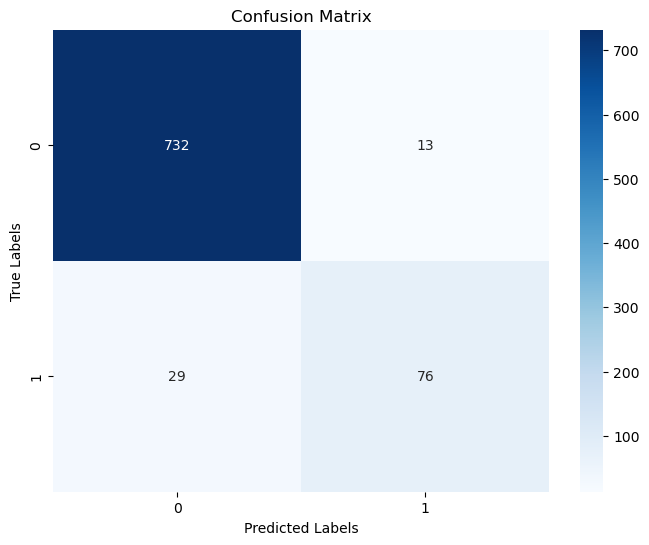

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [139]:
from sklearn.metrics import f1_score, accuracy_score

print(f1_score(y_test,pred))

0.7835051546391752


In [140]:
print(accuracy_score(y_test,pred))

0.9505882352941176


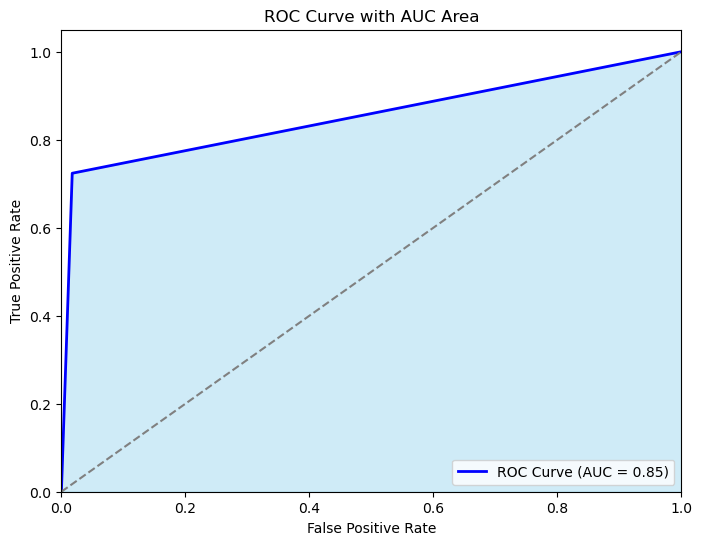

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.4)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Area')
plt.legend(loc='lower right')
plt.show()

In [142]:
print('Training set score {:}'.format(model.score(X_train, y_train)))
print('Test set score {:}'.format(model.score(X_test, y_test)))

Training set score 0.9576470588235294
Test set score 0.9505882352941176


In [143]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       745
         1.0       0.85      0.72      0.78       105

    accuracy                           0.95       850
   macro avg       0.91      0.85      0.88       850
weighted avg       0.95      0.95      0.95       850



The accuracy score of 95.29% is high, but with 35 false negatives, it may not fully capture performance on the minority class. Precision, recall, and F1-score provide better insights, especially when misclassifying the minority class is critical.

Task 2:
You are working on a disease prediction model based on patient health records. The dataset contains
500 patients' data, including symptoms, age, and medical history. The task is to predict whether a
patient has the disease (1) or not (0).

Using Train-Test Split:
• Split the dataset into a training set (80%) and a testing set (20%).
• Train a random forest and KNN classifier on the training set.
• Calculate and print accuracy, precision, recall, and F1-score on the testing set.
• Using Stratified K-Fold Cross-Validation:

Implement 10-fold stratified cross-validation using a KNN and RF classifier.
• Calculate the average precision across all folds.
• Ensure that the positive class is preserved in each fold.
• Compare the result of mean Validation score with Train Test Split using Accuracy Score.
• Plot ROC AUC Curve for RF with train test split and Cross Validation

Additional Evaluation
• Use balanced accuracy score and top K Accuracy Score from Sklearn.

In [168]:
df1 = pd.read_csv("diabetes_prediction_dataset.csv")

In [169]:
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [170]:
df1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [171]:
df1.shape

(100000, 9)

In [172]:
df1.duplicated().sum()

3854

In [173]:
df1 = df1.drop_duplicates()

In [174]:
df1.shape

(96146, 9)

In [175]:
df1['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [176]:
columns = ['gender', 'smoking_history']

encoder = OrdinalEncoder()

In [177]:
df1[columns] = encoder.fit_transform(df1[columns])

In [179]:
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,4.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0


In [180]:
X1 = df1.drop(['diabetes'], axis=1)

y1 = df1['diabetes']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [183]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"resampled dataset class distribution {Counter(y_train_res)}")

resampled dataset class distribution Counter({0: 70096, 1: 70096})


In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
model = KNeighborsClassifier()

In [187]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [190]:
y_pred = model.predict(X_test)

In [192]:
accuracy_score(y_test,y_pred)

0.9518460738429537

In [193]:
print('Training set score {:}'.format(model.score(X_train, y_train)))
print('Test set score {:}'.format(model.score(X_test, y_test)))

Training set score 0.9610614176504239
Test set score 0.9518460738429537


In [195]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

In [196]:
print(precision_score(y_test, y_pred, average='binary'))
print(recall_score(y_test, y_pred, average='binary'))
print(f1_score(y_test, y_pred, average='binary'))

0.8694779116465864
0.5210589651022864
0.6516177577125658


In [197]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
model1 = RandomForestClassifier(n_estimators=100,max_depth=5)

In [206]:
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [207]:
y_pred = model1.predict(X_test)

In [208]:
accuracy_score(y_test,y_pred)

0.971866874674987

In [209]:
print('Training set score {:}'.format(model1.score(X_train, y_train)))
print('Test set score {:}'.format(model1.score(X_test, y_test)))

Training set score 0.9704872848302044
Test set score 0.971866874674987


In [211]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [216]:
skf = StratifiedKFold(n_splits=5)
rf_cv_scores = cross_val_score(model1, X, y, cv=skf, scoring='accuracy')
print("Random Forest")
print(f"cross-validation accuracy scores {rf_cv_scores}")
print(f"mean cross-validation accuracy {rf_cv_scores.mean()}")

Random Forest
cross-validation accuracy scores [0.91411765 0.91882353 0.91764706 0.91647059 0.91764706]
mean cross-validation accuracy 0.9169411764705883


In [217]:
knn_cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print(f"cross-Validation cccuracy scores {knn_cv_scores}")
print(f"mean cross-validation accuracy {knn_cv_scores.mean()}")

cross-Validation cccuracy scores [0.94470588 0.96       0.95411765 0.95176471 0.96117647]
mean cross-validation accuracy 0.9543529411764705


In [224]:
from sklearn.model_selection import KFold, cross_val_score

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(classifier, X, y, cv=kf)

print("cross-validation scores" , cross_val_scores)
print("mean cross-validation Score ", cross_val_scores.mean())

cross-validation scores [0.96470588 0.95529412 0.95529412 0.96235294 0.96235294 0.95764706
 0.95058824 0.97176471 0.93647059 0.96705882]
mean cross-validation Score  0.9583529411764706


In [227]:
from sklearn.model_selection import KFold, cross_val_score

classifier1 = KNeighborsClassifier(n_neighbors=20)
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(classifier1, X, y, cv=kf)

print("cross-validation scores" , cross_val_scores)
print("mean cross-validation Score ", cross_val_scores.mean())

cross-validation scores [0.86823529 0.88       0.87529412 0.88235294 0.88       0.89176471
 0.88       0.90823529 0.88705882 0.89882353]
mean cross-validation Score  0.8851764705882352


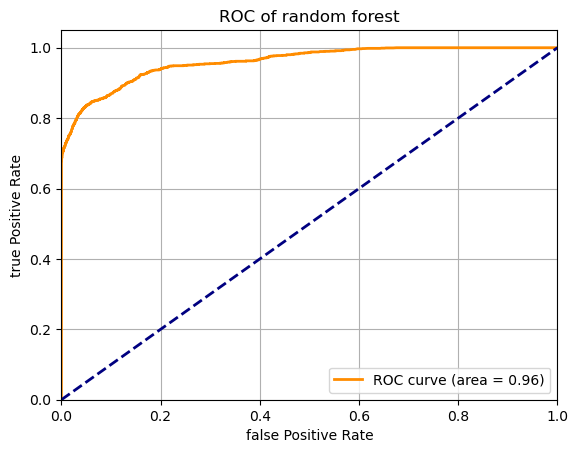

In [235]:
from sklearn.metrics import roc_curve, auc

rf_fpr, rf_tpr, _ = roc_curve(y_test, model1.predict_proba(X_test)[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false Positive Rate')
plt.ylabel('true Positive Rate')
plt.title('ROC of random forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Task 3:
Imagine you are working for a winery and your task is to build a machine learning model to classify
wines into categories based on their quality. The dataset you have contains various features related
to the chemical composition of the wines. The target variable, 'quality', with higher values indicating
better quality. Your goal is to create a model that can accurately predict the quality of wines based
on their features.
Features: Various chemical properties of wines (e.g., alcohol content, acidity, etc.).
Target Variable: 'quality' - an integer value indicating wine quality.

Data Exploration and Preprocessing
• Data Loading: Load the wine quality dataset into your Notebook Python environment.
• Data Exploration: Explore the dataset to understand its structure, features, and the
distribution of wine qualities.
• Data Preprocessing: Handle any missing or inconsistent data. Normalize or scale the
features if necessary.

Model Building and Evaluation
• Feature Selection: Choose relevant features that might influence wine quality.
• Train-Test Split: Split the dataset using Stratified Cross Validation
• Model Selection: Select appropriate classification algorithms for the task (e.g., Random

Forest, Random Forest, or KNN).
• Model Training: Train the selected models using the training data.
• Model Evaluation: Evaluate the models using appropriate metrics (accuracy, precision,
recall, F1-score) on the test data. Choose the model with the best performance.

Visualization and Interpretation
Visualization: Create visualizations (e.g., feature importance plots, confusion matrices) to better
understand your model's behavior and predictions.
Interpretation: Interpret the model's predictions. For example, which features contribute most to
high-quality wines?

Additional Challenges:
Imbalanced Classes: If the dataset has imbalanced classes, explore techniques such as
oversampling, under sampling, or using different evaluation metrics to compare with or without
handling imbalance dataset.
Classification: If the wine qualities are divided into more than two categories, modify your approach
for binary classification.

In [342]:
df2 = pd.read_csv("WineQT - WineQT.csv")

In [343]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [344]:
df2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [345]:
df2['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [346]:
df2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [347]:
df2.duplicated().sum()

0

In [348]:
df2 = df2.drop_duplicates()

In [349]:
X2 = df2.drop(['quality'], axis=1)

y2 = df2['quality']

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

In [358]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Resampled dataset class distribution: {Counter(y_train_res)}")

Resampled dataset class distribution: Counter({6: 398, 7: 398, 5: 398, 4: 398, 3: 398, 8: 398})


In [525]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=10, min_samples_split=3, min_samples_leaf=3)

In [526]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=3)

In [527]:
pred = rf.predict(X_test)

In [528]:
accuracy_score(y_test,pred)

0.6331877729257642

In [529]:
print('Training set score {:}'.format(rf.score(X_train, y_train)))
print('Test set score {:}'.format(rf.score(X_test, y_test)))

Training set score 0.912472647702407
Test set score 0.6331877729257642


In [530]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.62      0.80      0.70        85
           6       0.66      0.62      0.64       102
           7       0.58      0.52      0.55        27
           8       0.00      0.00      0.00         5

    accuracy                           0.63       229
   macro avg       0.37      0.39      0.38       229
weighted avg       0.59      0.63      0.61       229



C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [531]:
rf_f1 = f1_score(y_test,pred, average='weighted')
print(rf_f1)

0.6083853676281004


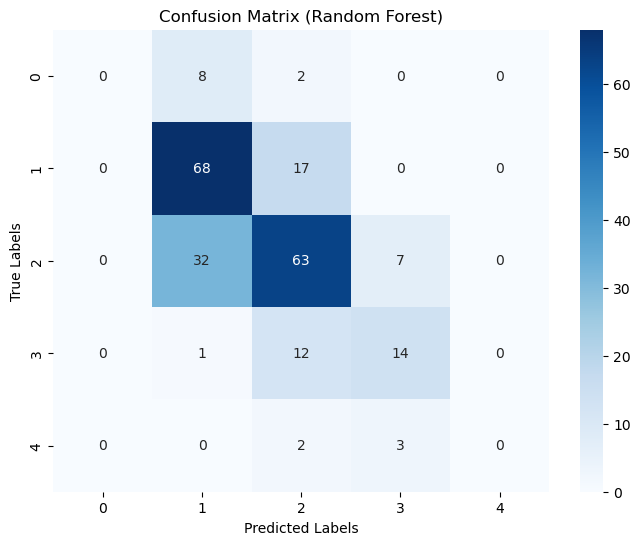

In [532]:
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [533]:
knn = KNeighborsClassifier(n_neighbors=3)

In [534]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [535]:
pred = knn.predict(X_test)

In [536]:
accuracy_score(y_test,pred)

0.4279475982532751

In [537]:
print('Training set score {:}'.format(knn.score(X_train, y_train)))
print('Test set score {:}'.format(knn.score(X_test, y_test)))

Training set score 0.7297592997811816
Test set score 0.4279475982532751


In [538]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        10
           5       0.44      0.53      0.48        85
           6       0.49      0.46      0.48       102
           7       0.40      0.22      0.29        27
           8       0.00      0.00      0.00         5

    accuracy                           0.43       229
   macro avg       0.22      0.20      0.21       229
weighted avg       0.43      0.43      0.42       229



C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mujta\anaconda3\Lib\site-packages\sklea

In [539]:
knn_f1 = f1_score(y_test, pred, average='weighted')
print(knn_f1)

0.42486212831789494


In [540]:
if rf_f1 > knn_f1:
    print("Random Forest performed better based on F1 Score")
else:
    print("KNN performed better based on F1 Score")

Random Forest performed better based on F1 Score


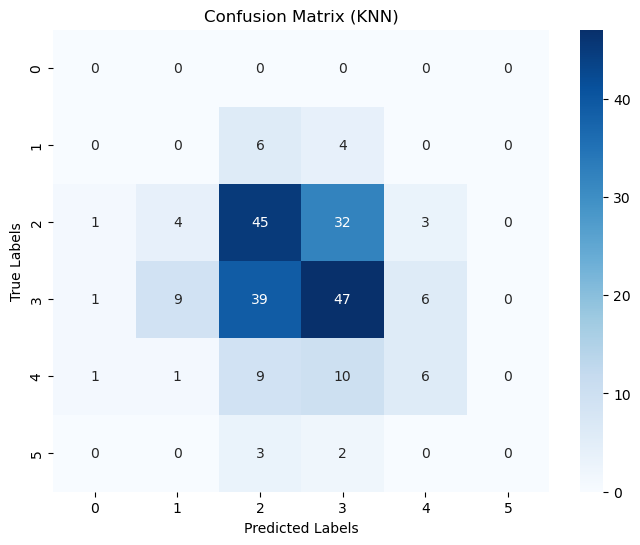

In [541]:
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (KNN)')
plt.show()

Task 4:

• Apply Evaluation Metrics to the previously covered labs

• Accuracy Score , Classification Report

• Confusion Matrix

• Precision, Recall and Specificity

• Calculate TP, TR , FP, FN

• F1 Score

• Plot AUC ROC Curve

only will apply on any one dataset of previous covered labs

In [548]:
df3 = pd.read_csv("heart.csv")

In [549]:
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [550]:
df3.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [551]:
df3=df3.drop_duplicates()

In [559]:
df3['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [553]:
X = df3.drop(columns=['target'])
y = df3['target']

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [555]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)

[[-0.68263287  0.6852096  -0.98005432 ... -0.71553867 -0.70553555
   1.1181192 ]
 [ 0.40398881  0.6852096  -0.98005432 ... -0.71553867  1.24887901
   1.1181192 ]
 [-1.00861938 -1.45940746 -0.00404981 ... -0.71553867 -0.70553555
  -0.54525566]
 ...
 [ 0.62131314 -1.45940746  1.9479592  ...  0.99183578 -0.70553555
  -0.54525566]
 [ 1.38194832 -1.45940746  0.97195469 ...  0.99183578  0.27167173
  -0.54525566]
 [-1.33460588  0.6852096  -0.00404981 ...  0.99183578 -0.70553555
  -0.54525566]]


In [556]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy_test = accuracy_score(y_test, pred)
print('accuracy with rf ', accuracy_test)

accuracy with rf  0.8524590163934426


In [557]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



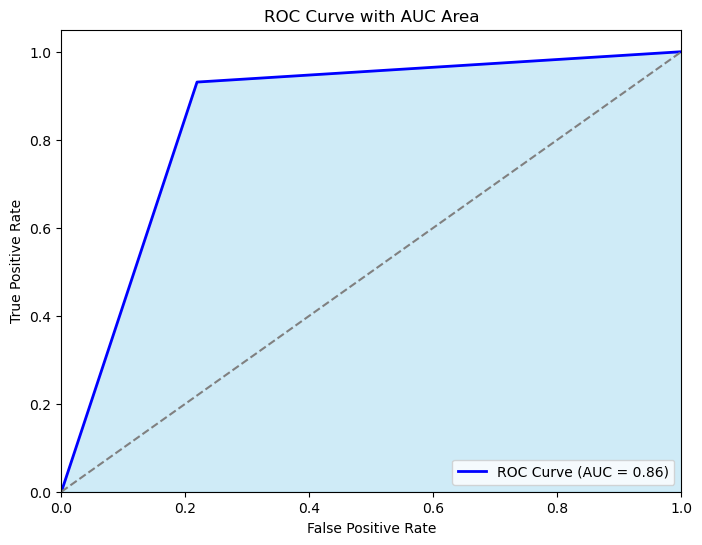

In [558]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.4)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Area')
plt.legend(loc='lower right')
plt.show()

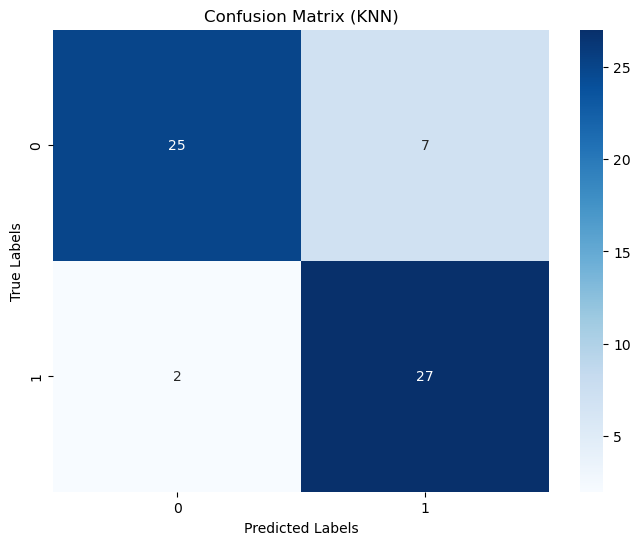

In [560]:
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (KNN)')
plt.show()

In [561]:
TN, FP, FN, TP = conf_matrix.ravel()

print(f"True Positives {TP}")
print(f"False Positives {FP}")
print(f"True Negatives {TN}")
print(f"False Negatives {FN}")

True Positives 27
False Positives 7
True Negatives 25
False Negatives 2
